# Customer Churn Analysis

#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

Examining customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

Importing all the necessary libraries here.

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

Copied the entire dataset from github and saved it as a csv file in my local computer and loaded it using pandas

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


By looking at the dataset we can see that we have categorical as well as numerical data in the dataset.

Our target variable churn is a categorical data hence it will be a classification model

Also we have identified that there is a feature column named customer id, which has no relevance in the prediction. It is just an unique id given to each customer, hence will consider dropping the column

# Exploratory Data Analysis (EDA)

In [4]:
df=df.drop(["customerID"],axis=1)

dropping the "customerID" column since it is just an unique id given to each customer

In [5]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
#Checking the size of the dataset
df.shape

(7043, 20)

We can see that we have 7043 rows and 20 columns out of which 1 is a target variable.

In [7]:
#checking all the columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#checking the datatypes of the dataset
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that we have object and float datatypes. TotalCharges is a float type data but it is showing object type lets change the data type.

The object datatypes will be encoded later

In [9]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [10]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Above is the info about the dataset there is no null values in the dataset.

In [11]:
#Checking unique values of each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
#Checking unique values of target column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Now we can see that our target variable 'Churn' has only 2 classes.

In [13]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('______________________________')

Male      3555
Female    3488
Name: gender, dtype: int64
______________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
______________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
______________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
______________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
______________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
______________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
______________________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
______________________________
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
____

Above are the value counts of each column and we can see some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i have to replace them.

Lets go with "No" for "No internet Service".If "no internet service" then there is "no" in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So lets replace all these entries with 'No'.

In [14]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [15]:
#Checking null values in the dataset
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see there are 11 null values in the 'Total Charges' feature.

## Treating Null Values

In [16]:
#Replacing nan values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [17]:
#Checking null values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

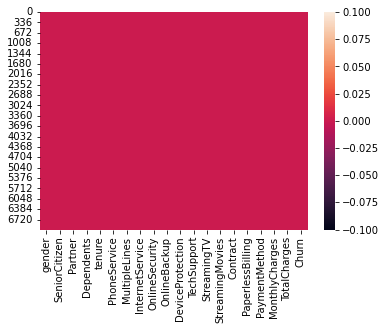

In [18]:
sns.heatmap(df.isnull())

Now we can clearly see that we have no null values in the dataset

## Statistical Summary of the Dataset

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Above are the statistics about the numerical columns.describe by default takes only numerical columns.There is some difference between the mean and 2nd quantile value which means there are some outliers.

Here I am using the describe method along with it's parameter all to include all the columns present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple data.

In [20]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


With the drop_duplicates option I am getting rid of all the duplicate values present in our dataset.

In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7021,2,Male,3541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7021.0,NaN,NaN,NaN,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0
Partner,7021,2,No,3619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7021,2,No,4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7021.0,NaN,NaN,NaN,32.469449,24.534965,0.0,9.0,29.0,55.0,72.0
PhoneService,7021,2,Yes,6339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7021,2,No,4050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7021,3,Fiber optic,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7021,2,No,5002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7021,2,No,4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I am using the describe method along with it's parameter all to include all the columns present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple times.

In [22]:
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2


With the usage of nunique method we can see the total number of unique values present in all the columns

# Data Visualization

In [23]:
# checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical:',cat_col,'\n')

Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 



In [24]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical:',num_col)

Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## Univariate Analysis for categorical columns

No     5164
Yes    1857
Name: Churn, dtype: int64


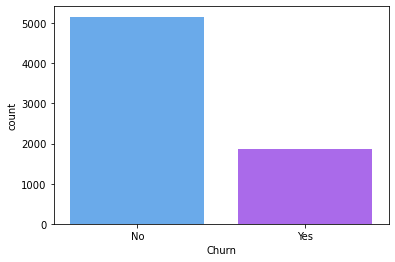

In [25]:
#Visualize the number of churned customers 
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="cool")
plt.show()

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn". That is there are more number of customers who have not churned. This leads to class imbalance issue in the data, we will rectify it by using oversampling method in later part.

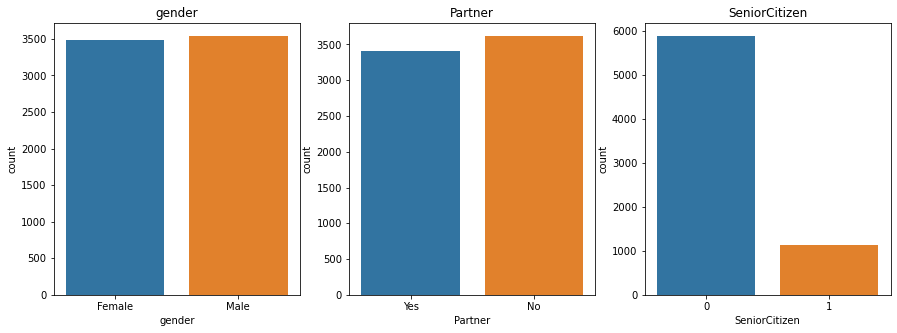

In [26]:
#Count plot for gender and Partner
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1,3,2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.subplot(1, 3, 3)
plt.title('SeniorCitizen')
sns.countplot(df['SeniorCitizen'])
plt.show()

Both the genders has same count almost and having partner or not also has same count. In senior citizen we see low number in senior citizen

No     4911
Yes    2110
Name: Dependents, dtype: int64


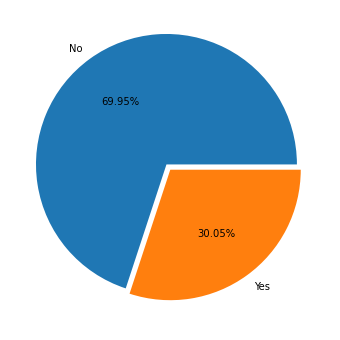

In [27]:
#Visualize the count of Gender
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0))
plt.show()

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here around 69.95% of customers have no dependents and 30.05% have dependents.

Yes    6339
No      682
Name: PhoneService, dtype: int64


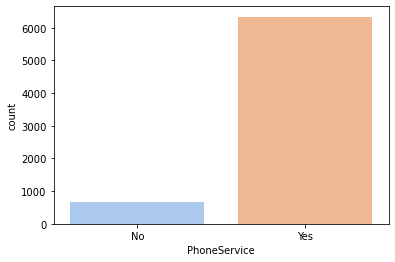

In [28]:
#Visualizing how many customers have Phone Service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="pastel")
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No     4050
Yes    2971
Name: MultipleLines, dtype: int64


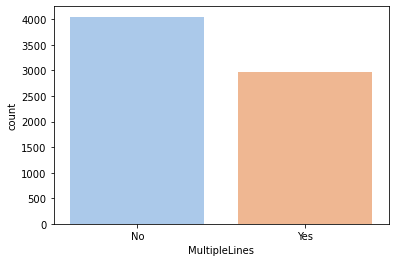

In [29]:
#Visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="pastel")
plt.show()

"No" in MultipleLines are more than "Yes"

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


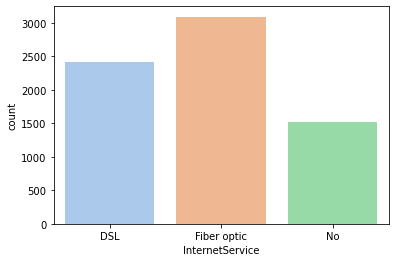

In [30]:
#Visualizing how many customers have Internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="pastel")
plt.show()

Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not have an internet service.

No     5002
Yes    2019
Name: OnlineSecurity, dtype: int64


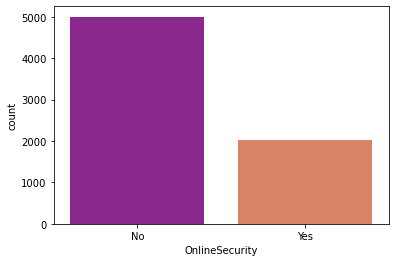

In [31]:
#Visualizing how many customers have OnlineSecurity
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="plasma")
plt.show()

In the count plot we can observe the majority of customers who have internet services but they do not use any online security.

No     4592
Yes    2429
Name: OnlineBackup, dtype: int64


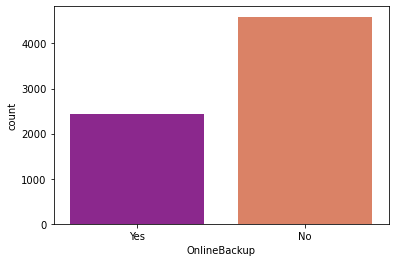

In [32]:
#Visualizing how many customers have Online backup
print(df["OnlineBackup"].value_counts())
sns.countplot(df["OnlineBackup"],palette="plasma")
plt.show()

We can see from the graph that we have more counts of customers without online backup

No     4599
Yes    2422
Name: DeviceProtection, dtype: int64


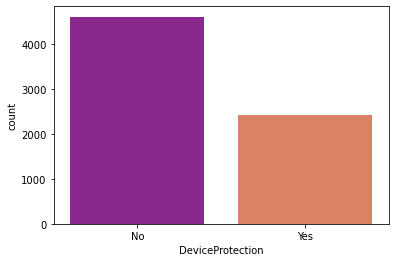

In [33]:
#Visualizing how many customers have DeviceProtection 
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"],palette="plasma")
plt.show()

Here also we can see that we have more customers with no device protection

No     4977
Yes    2044
Name: TechSupport, dtype: int64


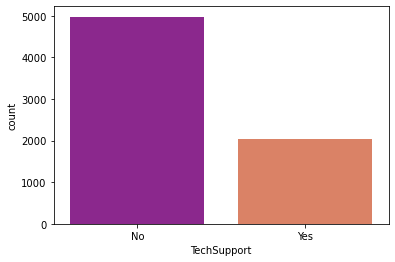

In [34]:
#Visualizing how many customers have TechSupport
print(df["TechSupport"].value_counts())
sns.countplot(df["TechSupport"],palette="plasma")
plt.show()

We can clearly see that we have more customers with no tech support.

No     4314
Yes    2707
Name: StreamingTV, dtype: int64


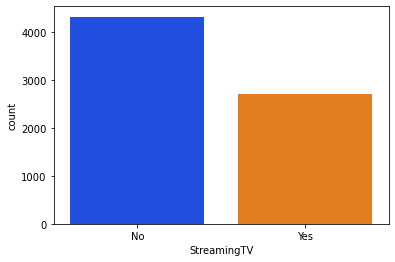

In [35]:
#Visualizing how many customers have StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="bright")
plt.show()

It is clearly showing that most customers do not have tv streaming

No     4289
Yes    2732
Name: StreamingMovies, dtype: int64


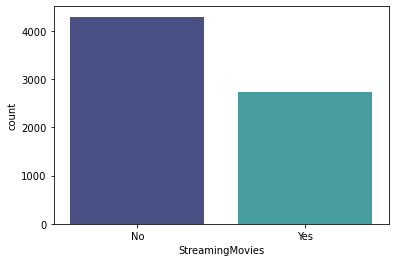

In [36]:
#Visualizing how many customers have StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="mako")
plt.show()

It is clearly showing that most customers do not have StreamingMovies.

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


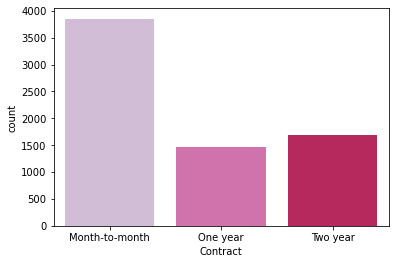

In [37]:
#Visualizing how many customers have Contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="PuRd")
plt.show()

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract.

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


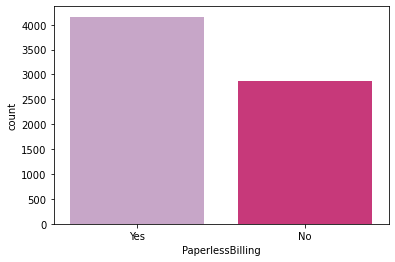

In [38]:
#Visualizing how many customers have PaymentMethod
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"],palette="PuRd")
plt.show()

Most of the customers prefer paperless billing.

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


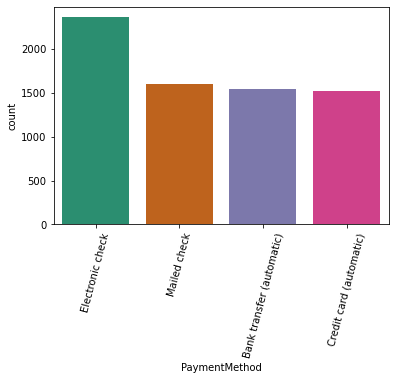

In [39]:
#Visualizing how many customers have Contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=75)
plt.show()

Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card are average in count.

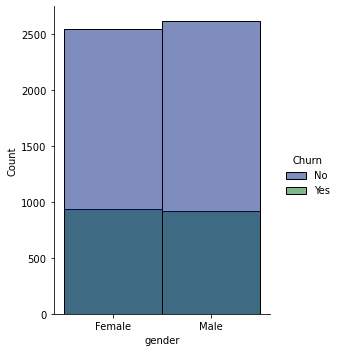

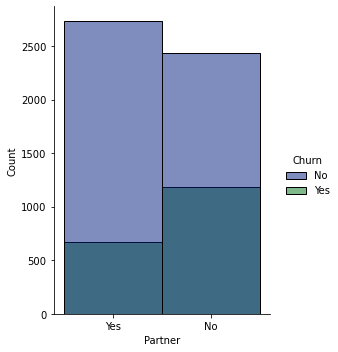

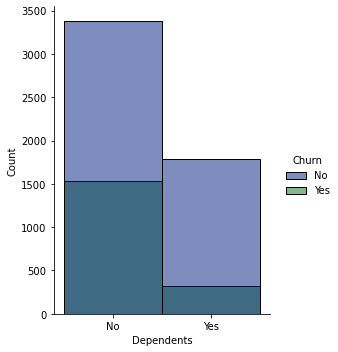

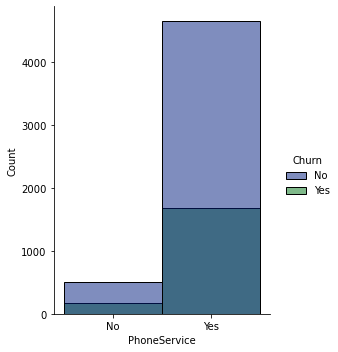

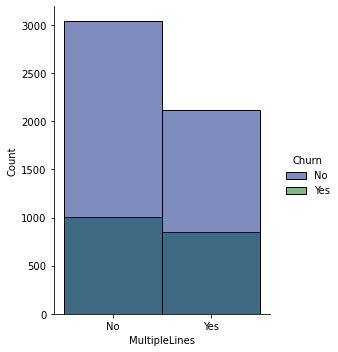

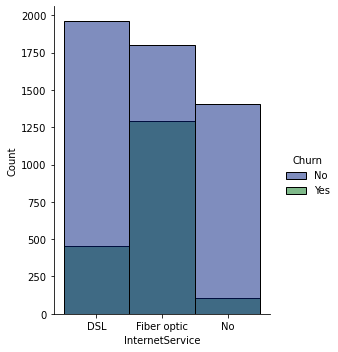

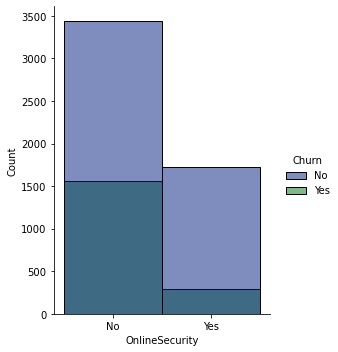

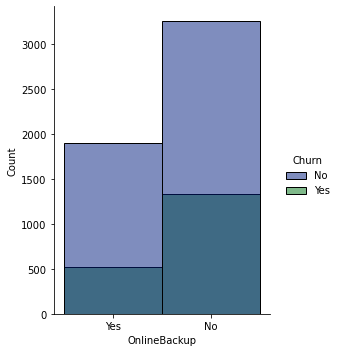

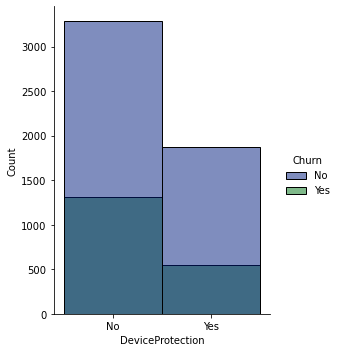

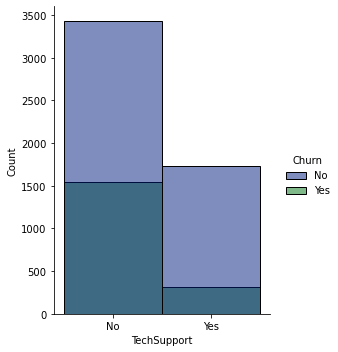

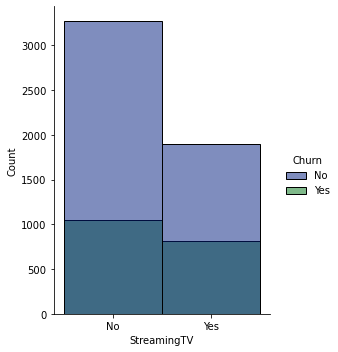

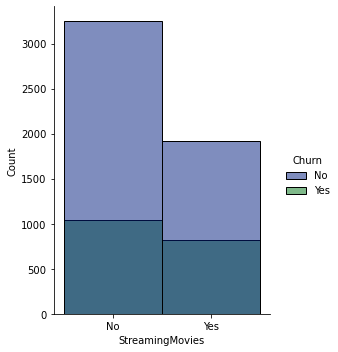

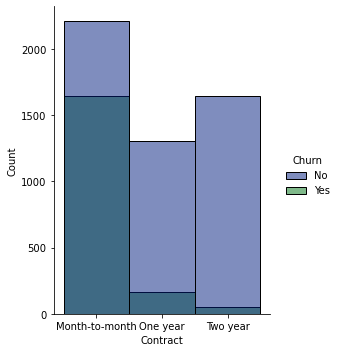

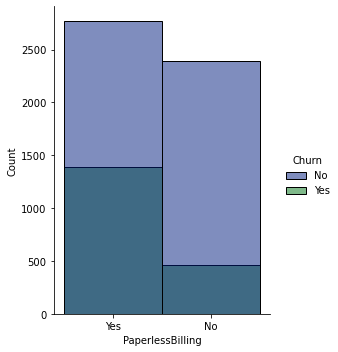

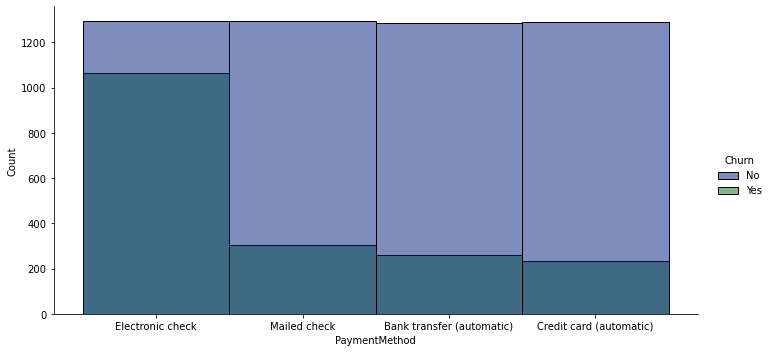

In [40]:
plt.style.use('seaborn-dark-palette')

new_data=cat_col
new_data.remove('Churn')
new_list=new_data
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, hue='Churn', data=df, element="bars", aspect=aspect_ratio)

With the help of above bar plot we can identify the No churn and Yes churn data and understand that the "Yes Churn" option has been significantly lower than its counterpart. However area where it is higher are the main points that will need to be resolved so that we can continue to retain our customer base

## Bivariate Analysis

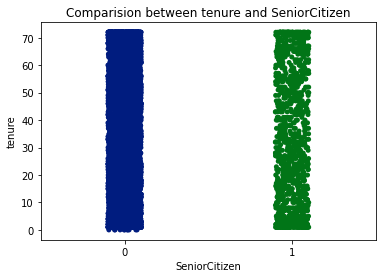

In [41]:
#Comparing tenure and SeniorCitizen 
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df)
plt.show()

There is no significant difference between the features.

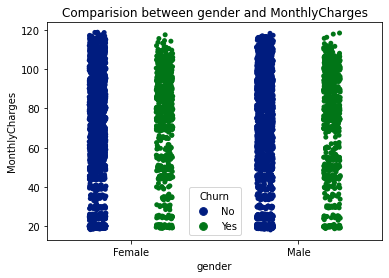

In [42]:
#Comparing gender and MonthlyCharges 
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Most both male and female customers with monthly charges above 70 have high chances of getting churned.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

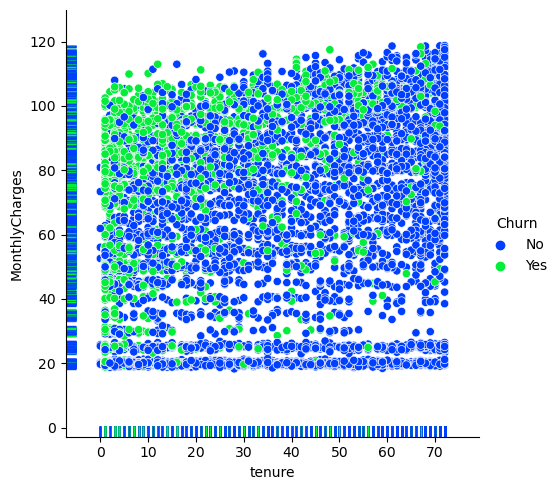

In [43]:
plt.style.use('default')
plt.style.use('seaborn-bright')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

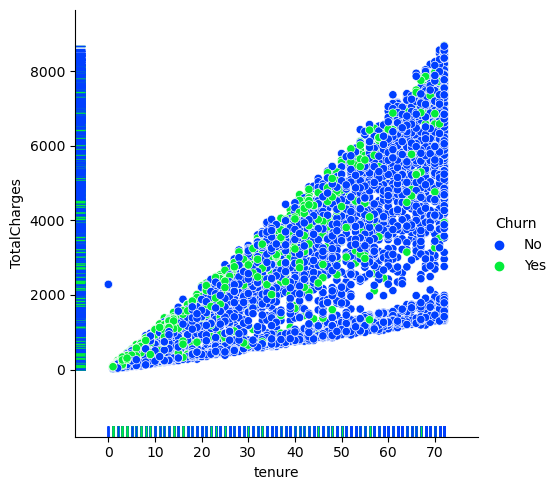

In [44]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

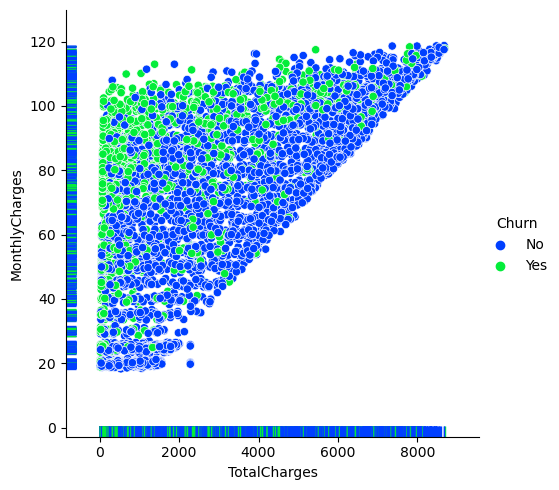

In [45]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

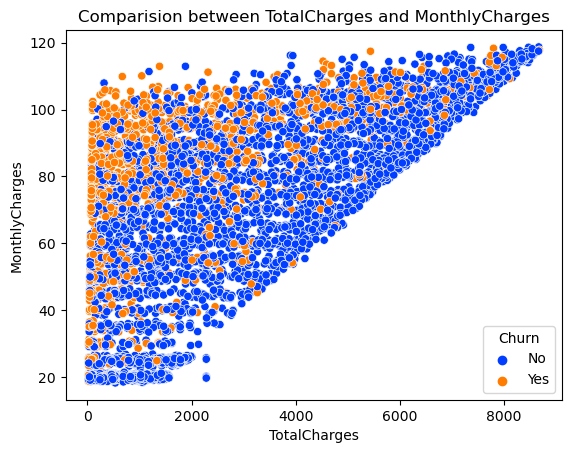

In [46]:
#Comparing TotalCharges and MonthlyCharges 
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df,hue="Churn",palette="bright")
plt.show()

There is a linear relation between the features. The customers with high monthly charges have high tendancy to stop the services since they have high total charges. Also if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

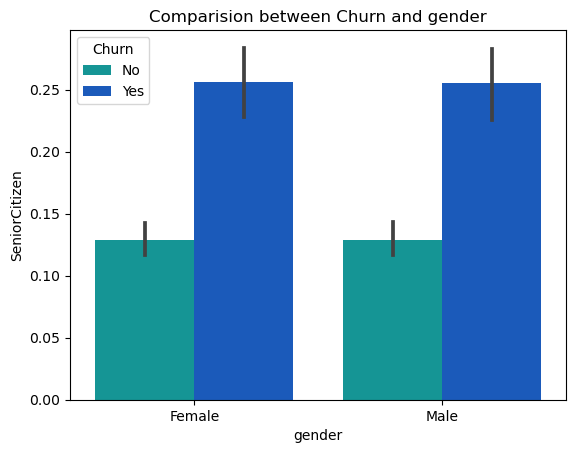

In [47]:
#Comparing gender and SeniorCitizen on the basis of churn
plt.title("Comparision between Churn and gender")
sns.barplot( x = "gender",y = "SeniorCitizen", data = df,palette="winter_r",hue="Churn")
plt.show()

There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case.

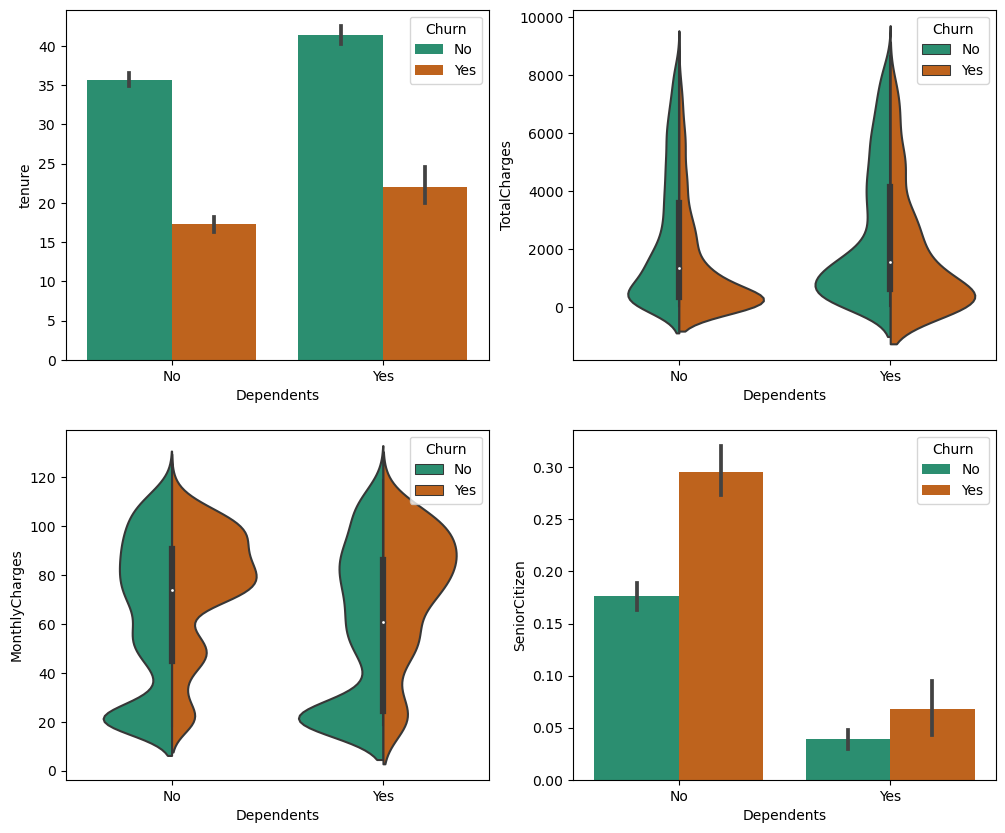

In [48]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=df,palette="Dark2",hue="Churn")

# Checking Churn level in TotalCharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=df,palette="Dark2",hue="Churn")
plt.show()

In [ ]:
The customers who have dependents with high tenure, then the churned level is high 80-110.

The customers who have total charges in the range of 0-2000 with dependents then the chance of getting churned is high.

The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then the ratio of churn is very high.

If the customer is a senior citizen and have no dependents then there is a tendancy of getting churned.

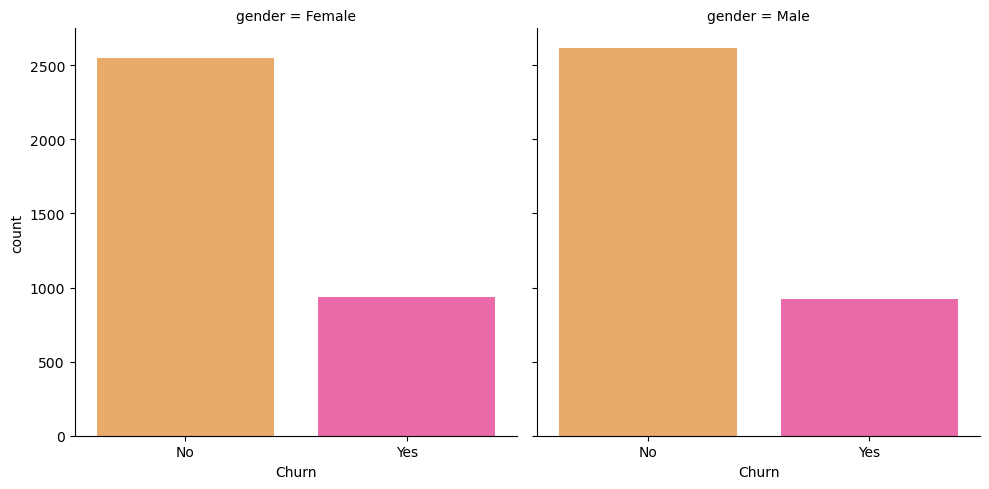

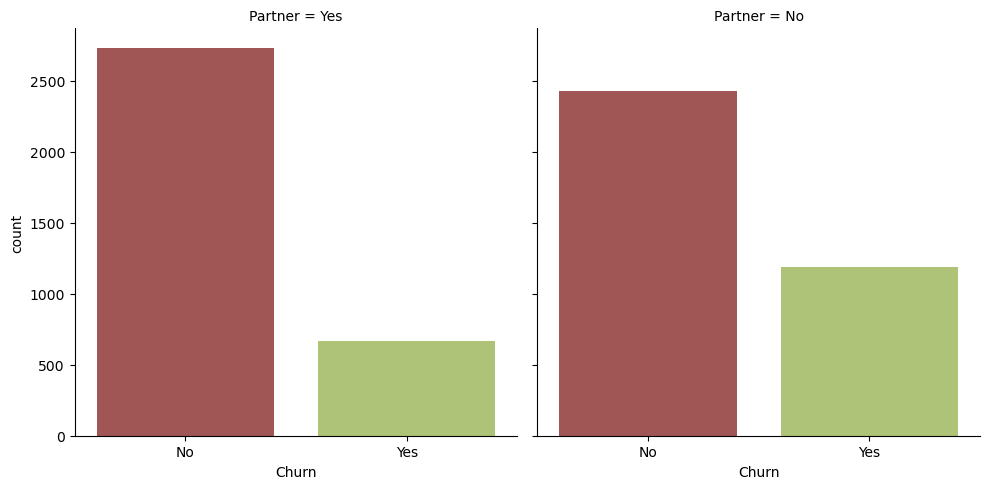

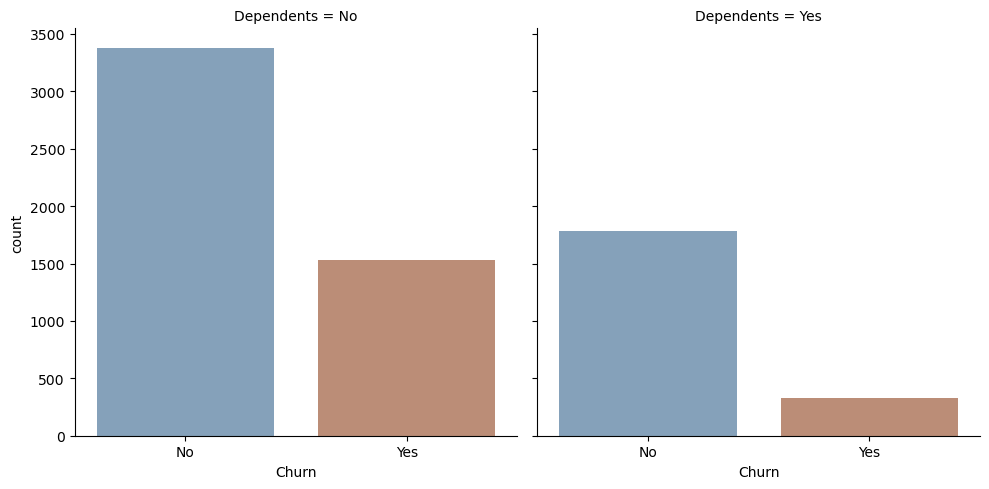

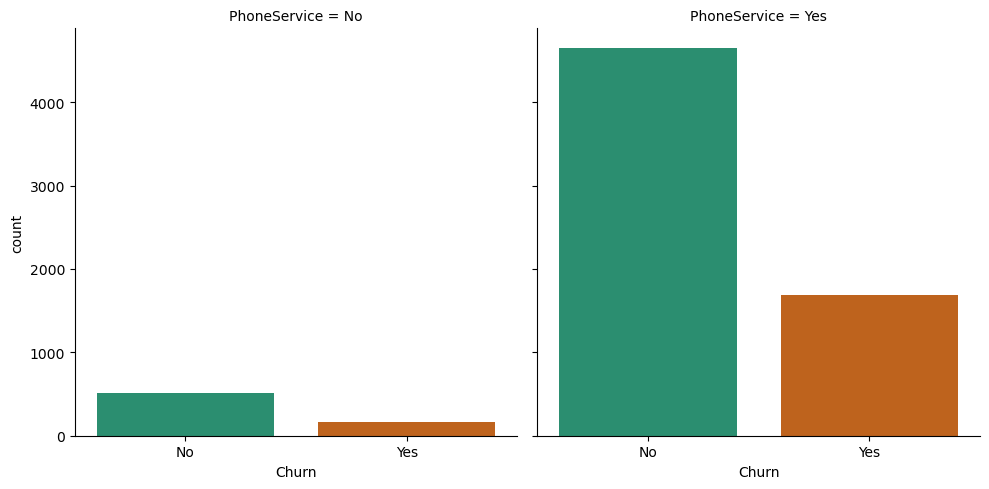

In [49]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned.

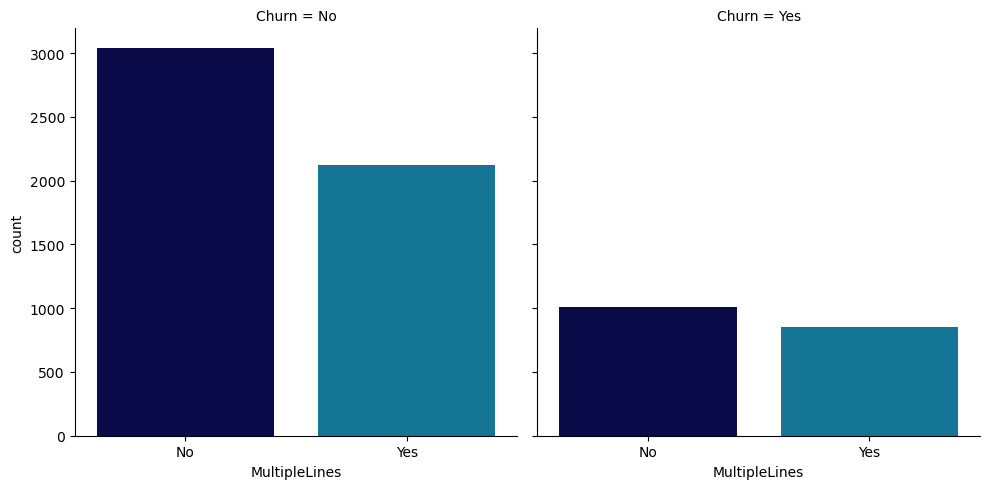

In [50]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

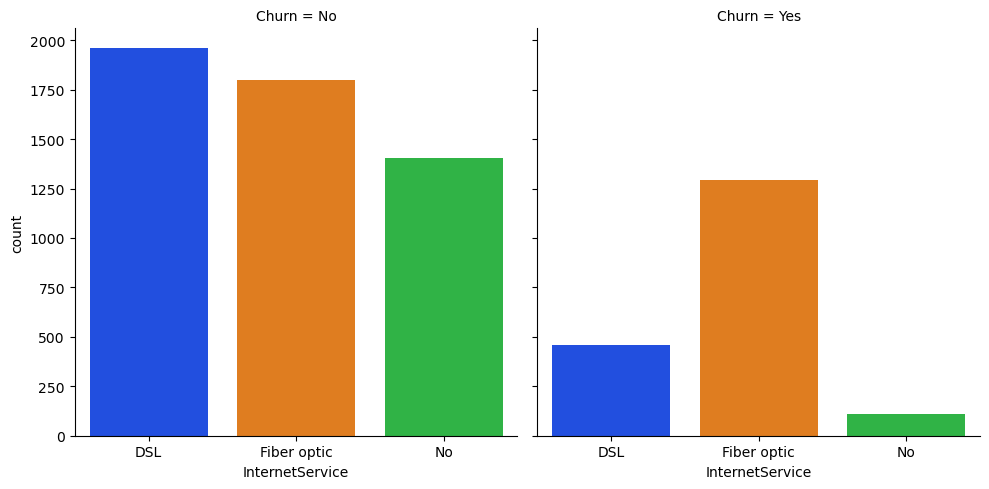

In [51]:
# Checking Churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and need to be focused on. And the customers who own DSL service they have very less churn rate.

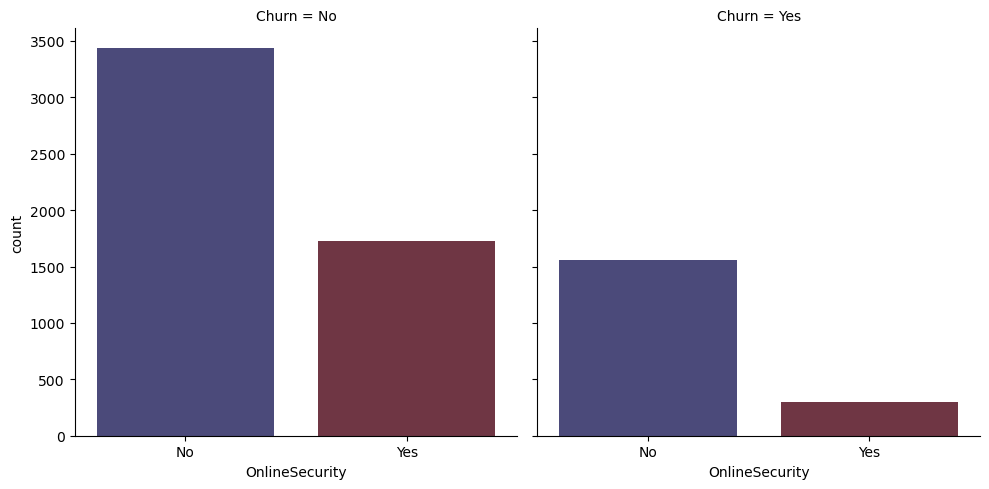

In [52]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

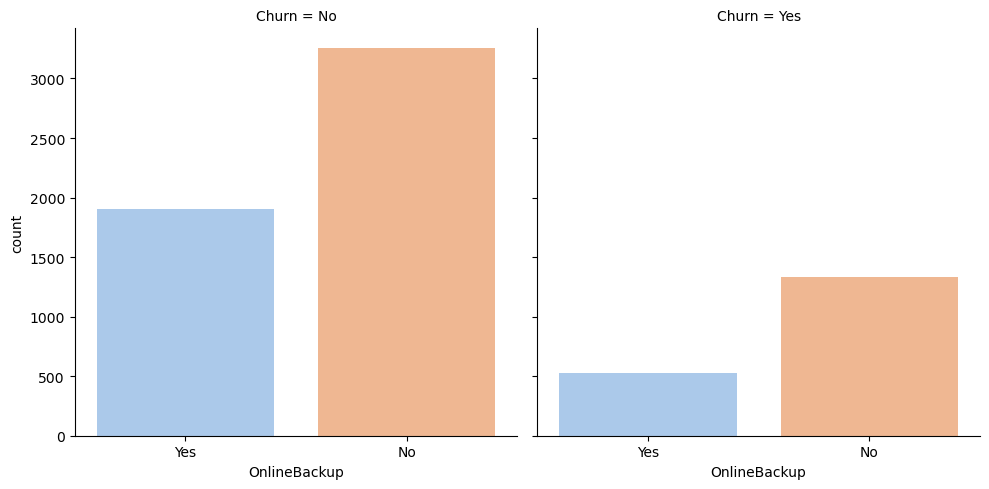

In [53]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

The customers who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

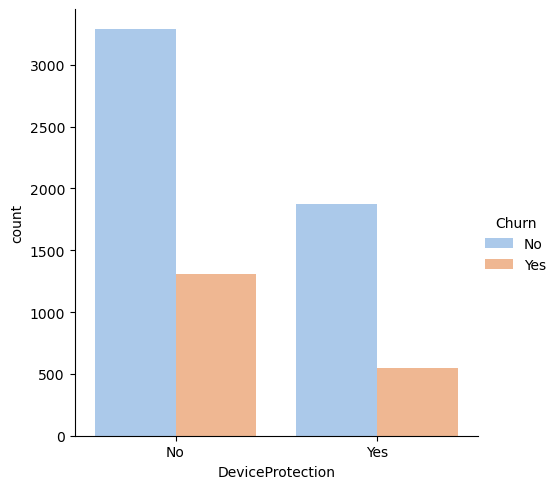

In [54]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="pastel",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

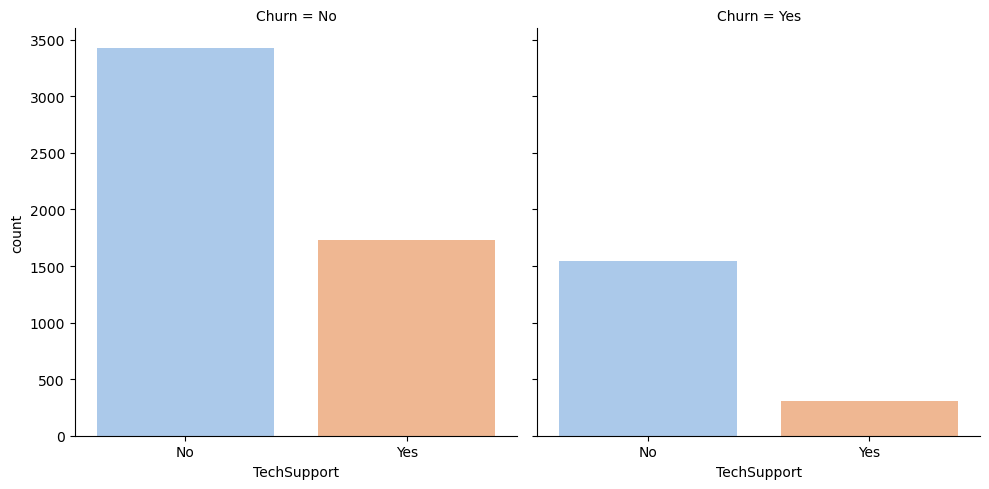

In [55]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

The customers who have No Tech Support have high churn rate.

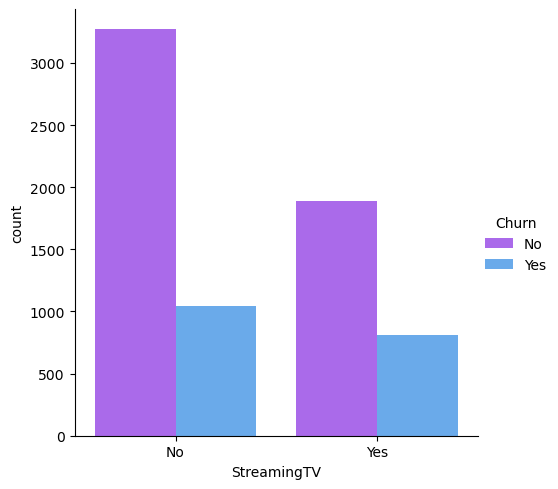

In [56]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV', hue='Churn', palette="cool_r", kind="count", data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.

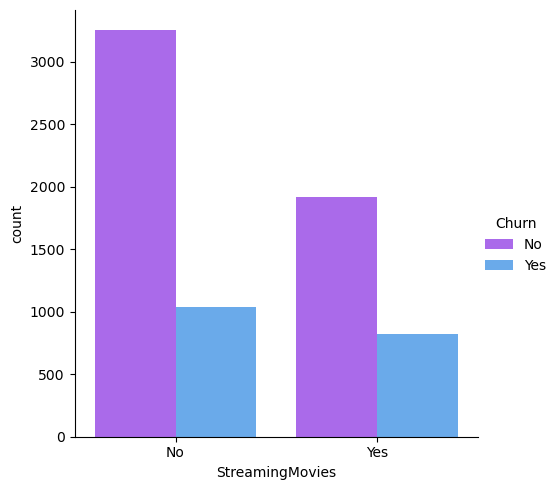

In [57]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The customers who do not have StreamingMovies have high churn rate.

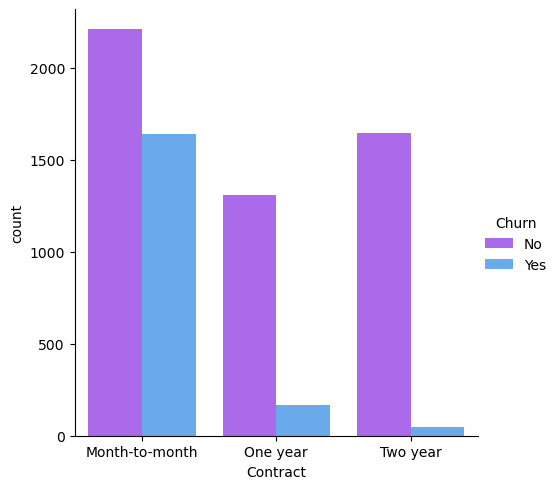

In [58]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The customers who have churned are mostly having month to month contract.

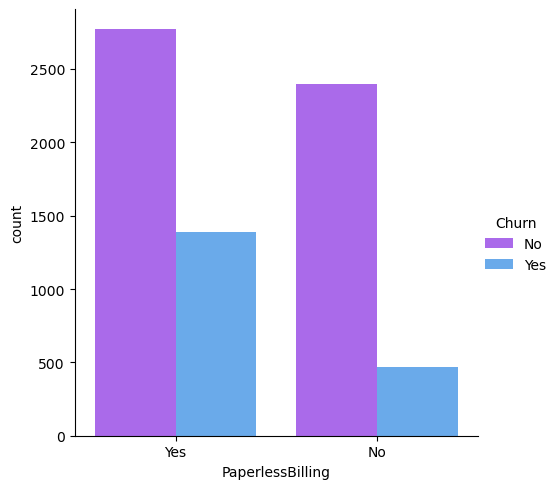

In [59]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The customers who prefer paperless billing they have high churn rate.

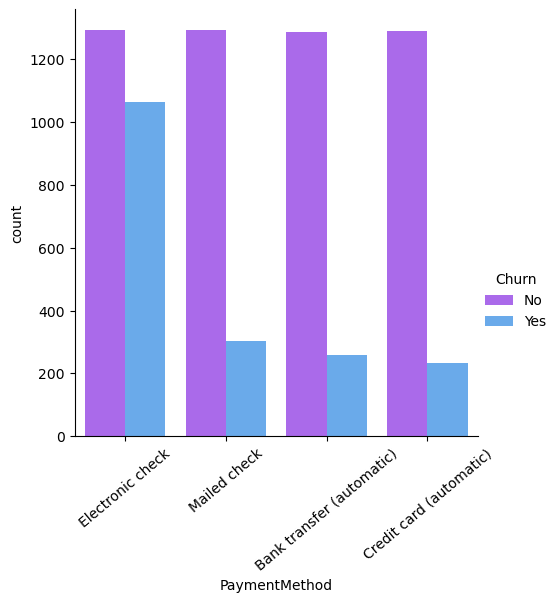

In [60]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="cool_r",kind="count",data=df)
plt.xticks(rotation=40)
plt.show()

Customers who use "Electronic check" payment have higher churn rate compared to other types of payments.

## Multivariate Analysis

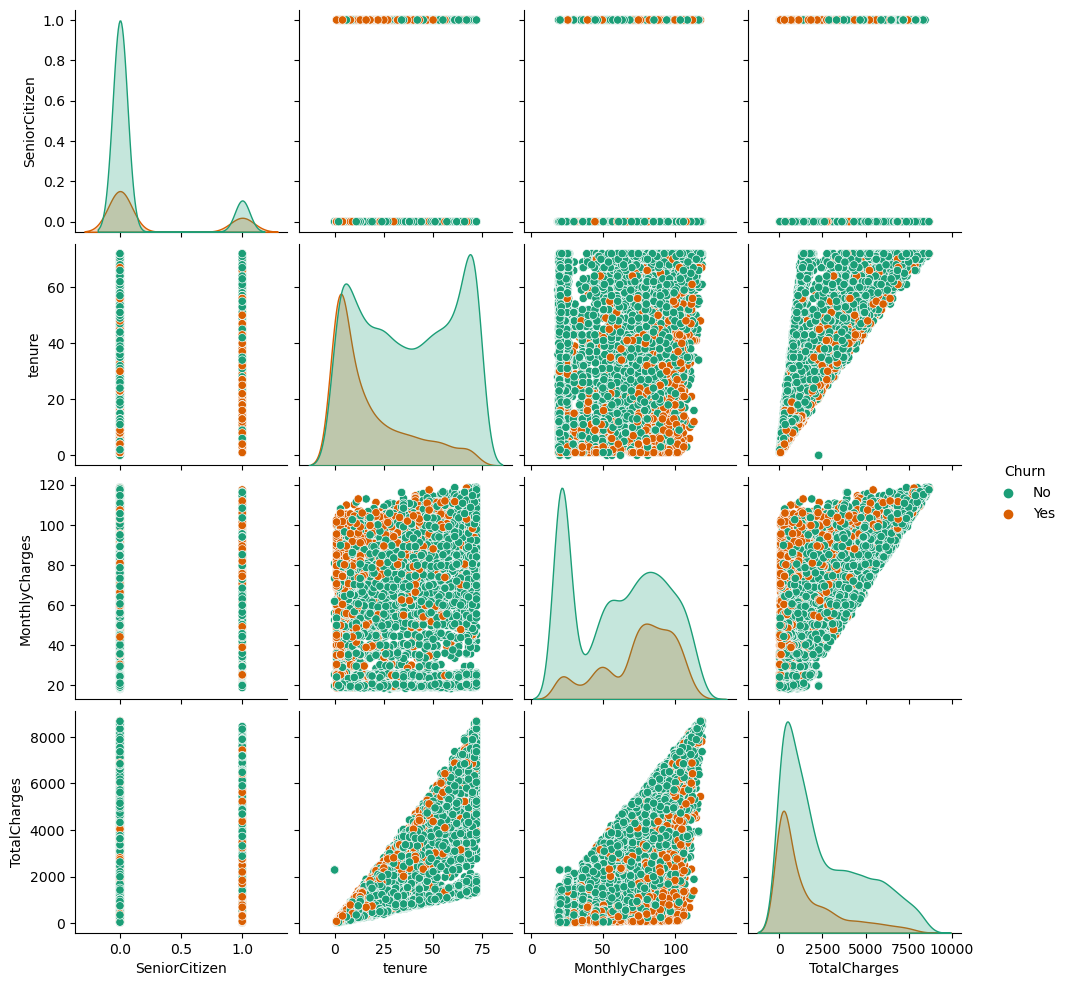

In [61]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers.

# Data Preprocessing

## Identifying the outliers

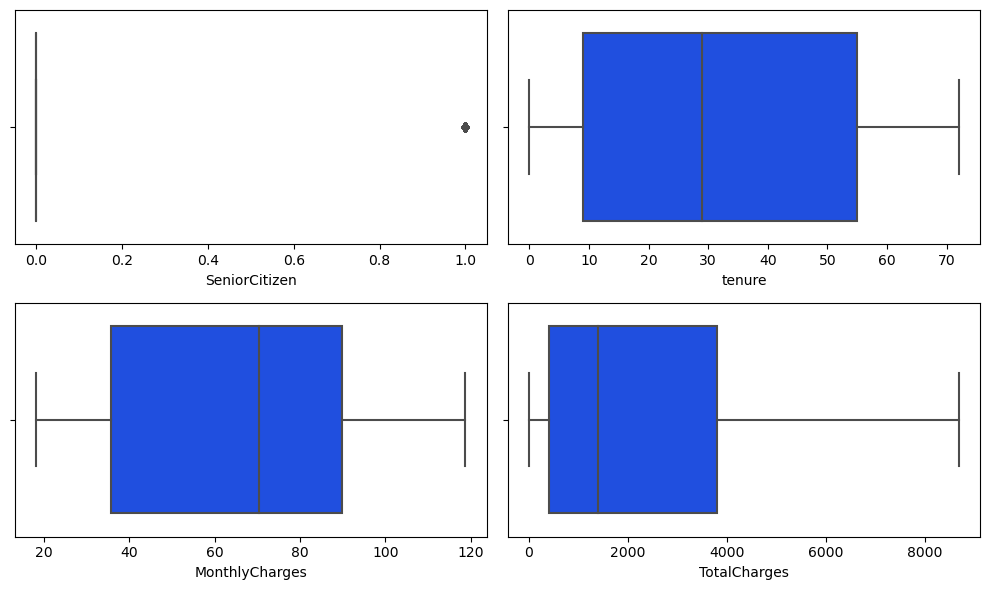

In [63]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers. Since all the other columns are categorical columns Hence we dont have to use z score methodd to remove the outliers.

## Checking the distribution of the numerical columns

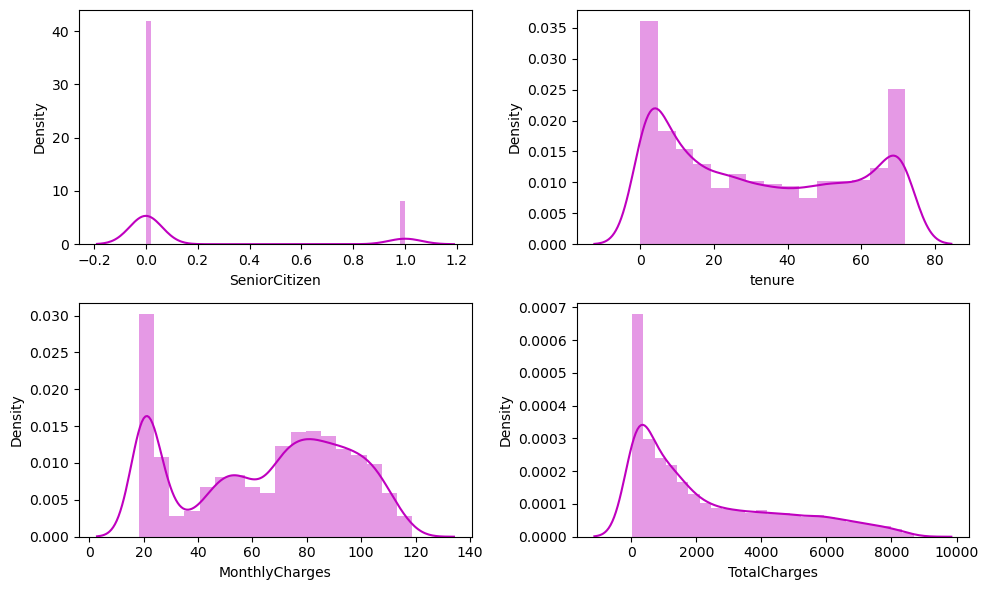

In [62]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data in SeniorCitizen is heavily skewed. And the data in the column TotalCharges is skewed to right. Other two columns tenure and MonthlyCharges do not have much skewness.

In [64]:
df.skew().sort_values()

MonthlyCharges   -0.224097
tenure            0.235542
TotalCharges      0.959088
SeniorCitizen     1.829987
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

## Removing skewness

In [65]:
# Removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [66]:
# Checking skewness again
df.skew().sort_values()

MonthlyCharges   -0.224097
TotalCharges      0.010538
tenure            0.235542
SeniorCitizen     1.829987
dtype: float64

## Encoding the categorical columns using Ordinal Encoding

In [67]:
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


Now we have converted the categorical columns into numerical columns using Ordinal Encoding method.

## Statistical Summary of the DataSet

In [68]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.423159,0.870816,0.287566,0.345962,0.344965,0.291127,0.385558,0.389118,0.692636,0.592651,1.570716,64.851894,11.383708,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.494095,0.737076,0.452660,0.475715,0.475391,0.454314,0.486761,0.487585,0.834163,0.491376,1.067530,30.069001,4.882227,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,7.435898,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.400000,11.214124,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.900000,15.607234,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical column we are able to see all the columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method describes the count, mean, standard deviation, min, IQR and max values of all the columns.

## Checking Correlation:

In [69]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.007730,-0.001762,-0.016534,-0.013206,-0.001511,-0.008703,-0.007760,-0.009856,0.000811,-0.011350,0.016304,-0.013158,-0.000490,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.142357,-0.031221,-0.039332,0.065950,0.058797,-0.061338,0.104765,0.119584,-0.143624,0.156196,-0.037320,0.219434,0.105061,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139834,0.003667,0.141482,0.139620,0.151941,0.118311,0.122572,0.115284,0.293042,-0.015776,-0.152069,0.094301,0.340864,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.026324,0.046608,0.079776,0.022217,0.012498,0.062039,-0.018207,-0.041441,0.241912,-0.112220,-0.038185,-0.116191,0.082048,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.329742,-0.026847,0.325704,0.358586,0.358968,0.322694,0.277575,0.283932,0.670728,0.005053,-0.367827,0.245251,0.867732,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,0.280935,0.387549,-0.092316,-0.051619,-0.070554,-0.095761,-0.021788,-0.032179,0.003101,0.016824,-0.005304,0.248984,0.090071,0.011323
MultipleLines,-0.007730,0.142357,0.139834,-0.026324,0.329742,0.280935,1.000000,0.013614,0.096583,0.200690,0.199591,0.099037,0.255579,0.257170,0.105130,0.163249,-0.168684,0.489539,0.468107,0.041958
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,0.013614,1.000000,-0.392445,-0.313719,-0.305763,-0.388791,-0.241122,-0.248948,0.102456,-0.137056,0.082669,-0.320525,-0.203324,-0.047366
OnlineSecurity,-0.016534,-0.039332,0.141482,0.079776,0.325704,-0.092316,0.096583,-0.392445,1.000000,0.282802,0.274398,0.354110,0.174919,0.186119,0.244301,-0.004202,-0.148360,0.295548,0.407868,-0.170520
OnlineBackup,-0.013206,0.065950,0.139620,0.022217,0.358586,-0.051619,0.200690,-0.313719,0.282802,1.000000,0.302398,0.293209,0.280816,0.273188,0.153493,0.126421,-0.168938,0.440965,0.490578,-0.081092


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

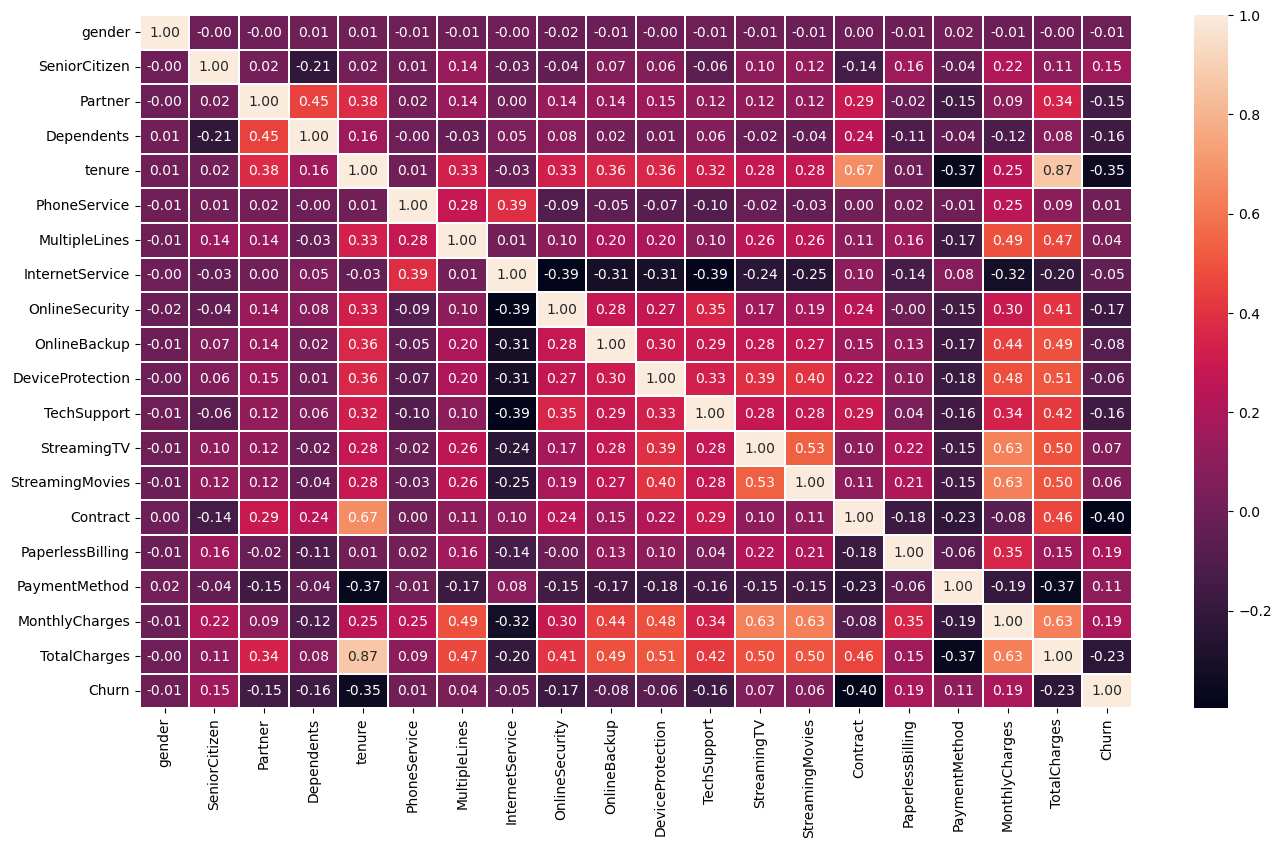

In [71]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.2f', annot = True)
plt.yticks(rotation=0)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

There is no much positive correlation between the target and features.

The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with the label Churn.

The label is negatively correlated with  Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very less correlation with the label.

The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [72]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
StreamingTV         0.065032
StreamingMovies     0.063192
MultipleLines       0.041958
PhoneService        0.011323
gender             -0.008763
InternetService    -0.047366
DeviceProtection   -0.064944
OnlineBackup       -0.081092
Partner            -0.149135
Dependents         -0.163459
TechSupport        -0.163937
OnlineSecurity     -0.170520
TotalCharges       -0.232394
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

## Visualizing the correlation between label and features using bar plot

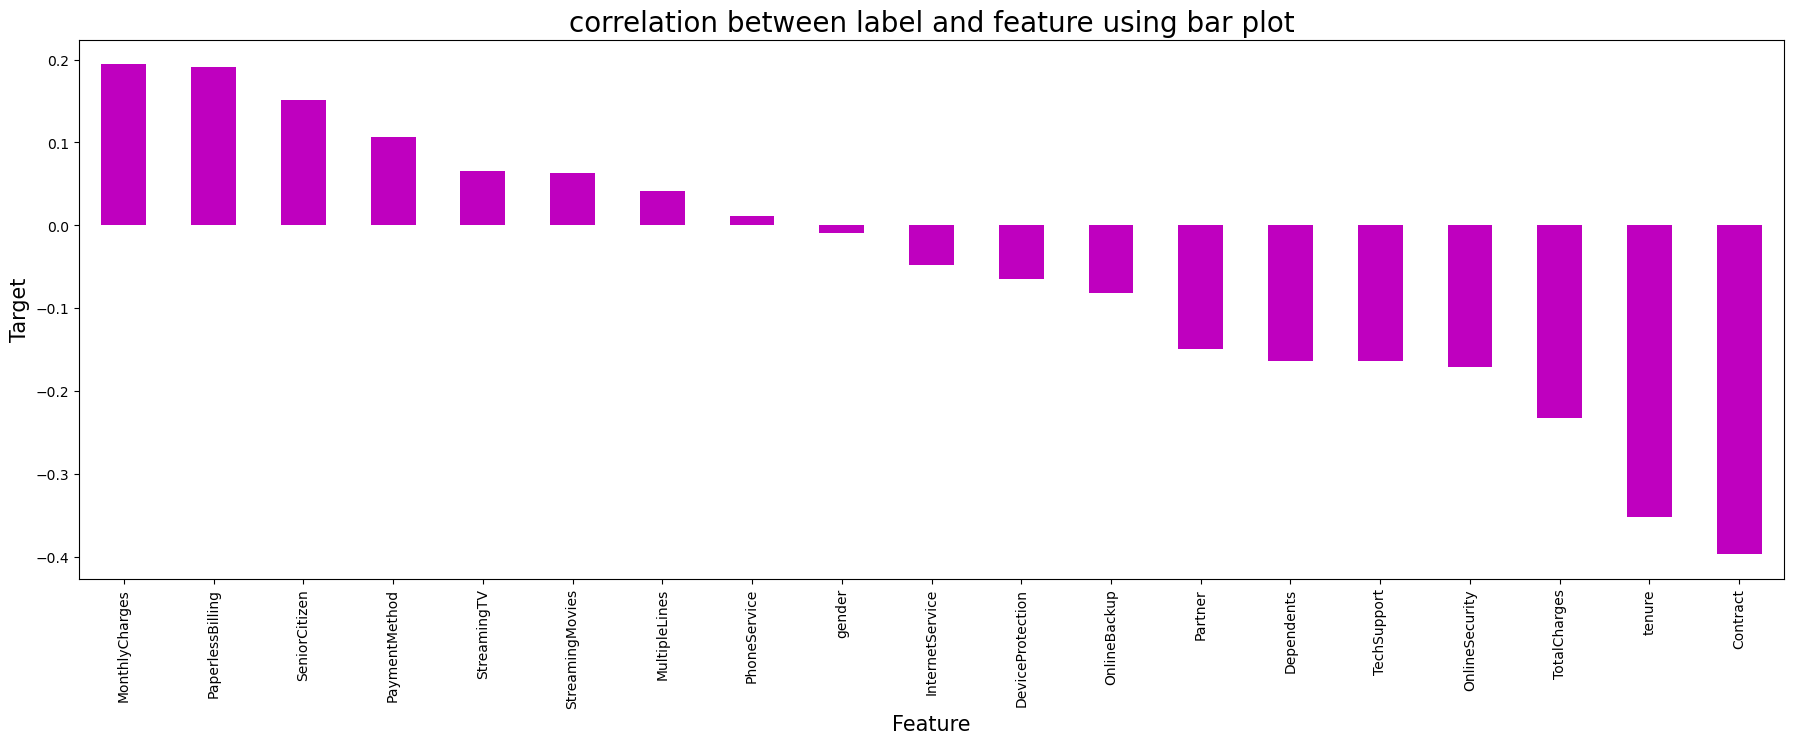

In [73]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

## Separating the feature and label into x and y

In [74]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [75]:
x.shape

(7021, 19)

In [76]:
y.shape

(7021,)

In [77]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066


In [78]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7021, dtype: float64

## Feature Scaling using Standard Scalarization

In [79]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008726,-0.440508,1.031400,-0.655475,-1.282728,-3.048725,-0.856493,-1.181531,-0.635326,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,-1.164135,-1.696409
1,0.991349,-0.440508,-0.969556,-0.655475,0.062387,0.328006,-0.856493,-1.181531,1.573996,-0.727299,1.377985,-0.640850,-0.792144,-0.798109,0.368496,-1.206190,1.338965,-0.262811,0.200549
2,0.991349,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.856493,-1.181531,1.573996,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,1.338965,-0.365914,-1.355892
3,0.991349,-0.440508,-0.969556,-0.655475,0.510759,-3.048725,-0.856493,-1.181531,1.573996,-0.727299,1.377985,1.560427,-0.792144,-0.798109,0.368496,-1.206190,-1.471460,-0.750058,0.178580
4,-1.008726,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.856493,0.175278,-0.635326,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,0.194503,-1.239483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,0.991349,-0.440508,1.031400,1.525611,-0.345224,0.328006,1.167552,-1.181531,1.573996,-0.727299,1.377985,1.560427,1.262397,1.252961,0.368496,0.829057,1.338965,0.663458,0.244890
7017,-1.008726,-0.440508,1.031400,1.525611,1.611307,0.328006,1.167552,0.175278,-0.635326,1.374951,1.377985,-0.640850,1.262397,1.252961,0.368496,0.829057,-0.534652,1.275428,1.653179
7018,-1.008726,-0.440508,1.031400,1.525611,-0.875118,-3.048725,-0.856493,-1.181531,1.573996,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,-1.172450,-0.893164
7019,0.991349,2.270104,1.031400,-0.655475,-1.160445,0.328006,1.167552,0.175278,-0.635326,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,1.338965,0.317562,-0.950585


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

## Checking Multicollinearity

In [80]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [81]:
calc_vif(x)

,Features,VIF values
0,gender,1.001724
1,SeniorCitizen,1.149475
2,Partner,1.458943
3,Dependents,1.382974
4,tenure,12.327041
5,PhoneService,1.713697
6,MultipleLines,1.546647
7,InternetService,1.903750
8,OnlineSecurity,1.476568
9,OnlineBackup,1.479219


By checking VIF value we can find the features which is causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [82]:
# Dropping the feature Total Volume
x.drop("TotalCharges",axis=1, inplace=True)

In [83]:
calc_vif(x)

,Features,VIF values
0,gender,1.001709
1,SeniorCitizen,1.149421
2,Partner,1.456939
3,Dependents,1.381230
4,tenure,2.741540
5,PhoneService,1.713051
6,MultipleLines,1.536711
7,InternetService,1.896649
8,OnlineSecurity,1.463918
9,OnlineBackup,1.468302


All the columns have VIF less than 10 which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

In [84]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [85]:
x.shape

(7021, 18)

## SMOTE

In [86]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [87]:
y.value_counts()

0.0    5164
1.0    5164
Name: Churn, dtype: int64

In [88]:
x.shape

(10328, 18)

In [89]:
y.shape

(10328,)

# Machine Learning

### Finding best random state

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

For Test size .30

In [92]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.862213617295902  on Random_state  28


For Test size .20

In [93]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8756050338818974  on Random_state  29


We have got the best random state as 29 for test size 0.2.

## Feature importance bar graph

,Importance
Features,
tenure,0.207
MonthlyCharges,0.194
Contract,0.142
PaymentMethod,0.090
InternetService,0.064
TechSupport,0.034
PaperlessBilling,0.033
OnlineSecurity,0.032
gender,0.029


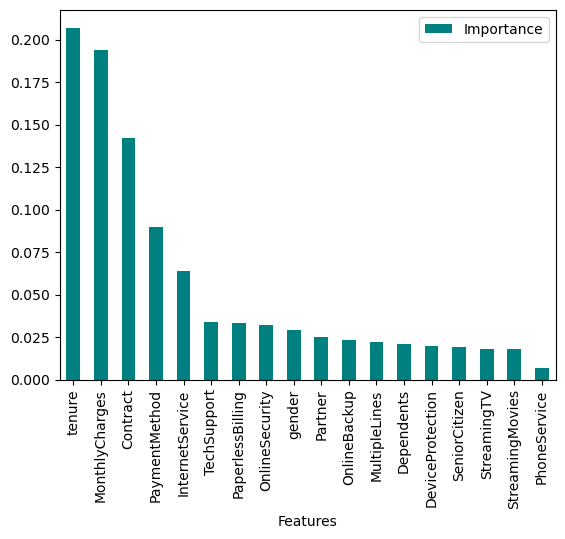

In [97]:
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

This bar plot shows us the importance of the features using random forest algorithm on predicting our Target variable.

## Creating train_test split

In [94]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [108]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=29)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [109]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 77.34753146176186

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      1034
         1.0       0.76      0.80      0.78      1032

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 77.58541965032852

Accuracy Score - Cross Validation Score is -0.23788818856665728


### Naive Bayes

In [110]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 77.44433688286544

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.71      0.76      1034
         1.0       0.74      0.83      0.79      1032

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066

Cross Validation Score: 76.83016860082179

Accuracy Score - Cross Validation Score is 0.61416828204365


### SVC Classifier

In [111]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 80.54211035818007

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      1034
         1.0       0.78      0.84      0.81      1032

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Cross Validation Score: 80.54849998476428

Accuracy Score - Cross Validation Score is -0.006389626584208941


In [112]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 77.20232333010648

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1034
         1.0       0.75      0.82      0.78      1032

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 77.13029822163988

Accuracy Score - Cross Validation Score is 0.07202510846660459


In [113]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 78.94482090997096

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78      1034
         1.0       0.76      0.85      0.80      1032

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Cross Validation Score: 78.80546798272034

Accuracy Score - Cross Validation Score is 0.13935292725061288


### Decision Tree Classifier

In [114]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 80.54211035818007

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      1034
         1.0       0.80      0.81      0.81      1032

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Cross Validation Score: 78.53487690710195

Accuracy Score - Cross Validation Score is 2.007233451078122


### KNeighbors Classifier

In [115]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 78.89641819941917

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      1034
         1.0       0.74      0.90      0.81      1032

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066

Cross Validation Score: 79.18298099754118

Accuracy Score - Cross Validation Score is -0.2865627981220058


### SGD Classifier

In [116]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 76.13746369796709

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75      1034
         1.0       0.74      0.81      0.77      1032

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066

Cross Validation Score: 76.59773245606839

Accuracy Score - Cross Validation Score is -0.460268758101293


### Random Forest Classifier

In [117]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 87.02807357212004

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1034
         1.0       0.86      0.88      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 85.28373833002446

Accuracy Score - Cross Validation Score is 1.7443352420955733


In [120]:
model = RandomForestClassifier(random_state=29)
classifier(model, x, y)

Accuracy Score: 86.97967086156825

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1034
         1.0       0.86      0.89      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 85.39025710863537

Accuracy Score - Cross Validation Score is 1.5894137529328844


### ExtraTrees Classifier

In [119]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 87.07647628267183

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1034
         1.0       0.86      0.89      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 86.40666715108442

Accuracy Score - Cross Validation Score is 0.6698091315874137


In [121]:
model = ExtraTreesClassifier(random_state=29)
classifier(model, x, y)

Accuracy Score: 86.73765730880929

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1034
         1.0       0.86      0.88      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 86.46475040374656

Accuracy Score - Cross Validation Score is 0.27290690506272597


### AdaBoost Classifier

In [122]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 83.10745401742497

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      1034
         1.0       0.80      0.88      0.84      1032

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

Cross Validation Score: 81.47826331543332

Accuracy Score - Cross Validation Score is 1.6291907019916465


### Gradient Boosting Classifier

In [124]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 84.99515972894483

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1034
         1.0       0.83      0.88      0.85      1032

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Cross Validation Score: 83.71520454540129

Accuracy Score - Cross Validation Score is 1.2799551835435352


Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

# Hyper Parameter Tuning

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=29)

In [126]:
x_test.shape

(2066, 18)

In [127]:
y_test.shape

(2066,)

In [128]:
x_train.shape

(8262, 18)

In [129]:
y_train.shape

(8262,)

In [130]:
#ExtraTreesClassifier?

In [139]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 29],
              'n_estimators': [100, 200, 300]}

In [140]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [141]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 29]})

In [142]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': None}

We got the best parameters using Gridsearch CV

In [143]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 200, n_jobs = -2 , random_state = None)   # final model with best parameters

In [144]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [145]:
final_predc = final_modelc.predict(x_test)   # predicting with best parameters

In [146]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  87.1732817037754


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [147]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 86.42603761113286


We got final accuracy score of 87.17% and Cross Validation Score of 86.426% which is good

In [148]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1034
         1.0       0.86      0.89      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066



## Confusion Matrix

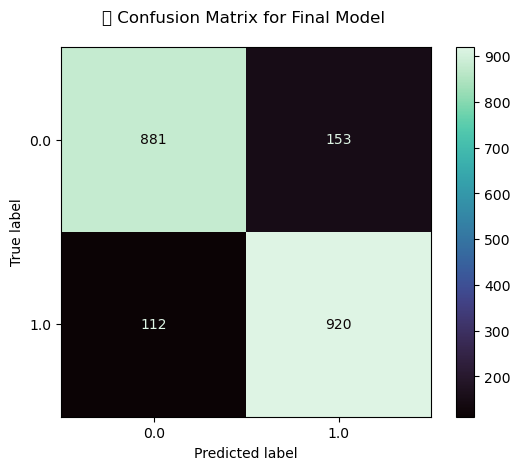

In [149]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

# AUC ROC curve

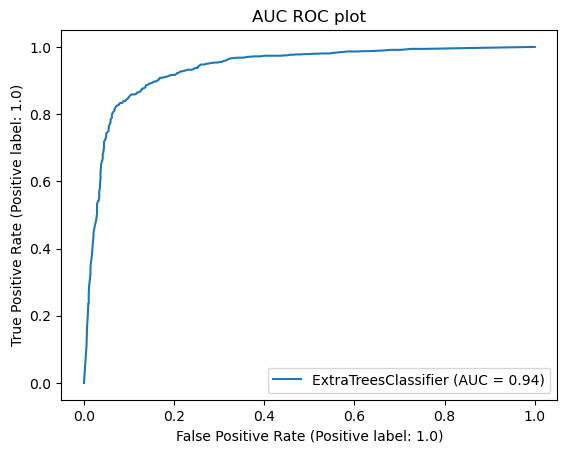

In [150]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 87.17% and Cross Validation Score of 86.426% and also AUC score is 0.94 which is really good.

# Saving the model in pickle Format

In [151]:
# pickeling or serialization of a file
import pickle
filename = 'Customer_Churn_Analysis_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

# Prediction Conclusion:

In [152]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,1.0,1.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
2061,0.0,0.0
2062,1.0,1.0
2063,0.0,0.0
2064,1.0,1.0


Hence predicted the "Churn" using the final Model.

Saving the comparison file as a csv file.

In [153]:
df_comparisonc.to_csv('Customer_Churn_Analysis_Prediction.csv')

Saved the file as a csv.

# Thank You